In [ ]:
# !python -m venv venv
# # !venv/scripts/activate
# !pip install pandas numpy matplotlib seaborn plotly geopandas scipy scikit-learn statsmodels requests

In [19]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

# Scientific Computing
import scipy

# Machine Learning
import sklearn

# Statistical Models
import statsmodels.api as sm

import requests
import os

pd.set_option('display.max_columns', None)

In [2]:
'''df = pd.read_json(os.path.join('aircraft_data_2024-02-01','aircraft_data_2024-02-01.json')
df = pd.json_normalize(df['aircraft'])
df'''

"df = pd.read_json(os.path.join('aircraft_data_2024-02-01','aircraft_data_2024-02-01.json')\ndf = pd.json_normalize(df['aircraft'])\ndf"

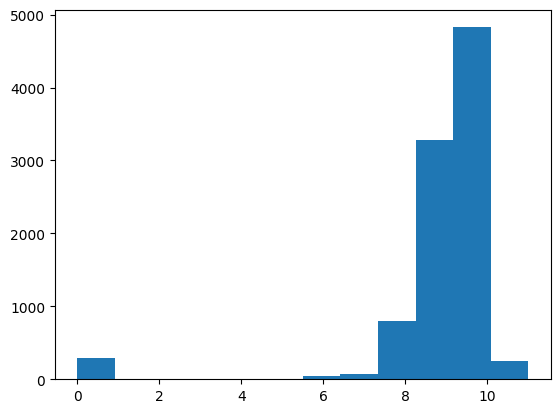

In [21]:
# for each timeslice of 5 minutes, find the aircraft-ping with nac_p, nac_v above a certain threshold, 
# and gpsOkBefore, rr_lat, rr_lon if these values are not empty
# (each timeslice is 800kb)
#
# after filtering the timeslice, the filtered data should be much smaller say 10 kb
#
# define array of locations (squares) according to lat and lon limits
# 
# loop through all timeslice-aircraft-ping and find location and append
# 
# loop through all locations and run the data through the classification function to determine the color

url = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000000Z.json.gz'
response = requests.get(url)
json_data = response.json()
df1 = pd.json_normalize(json_data['aircraft'])
df1_filtered = df1[df1[['nac_p','nac_v']].notnull().all(1)]
nacp_high = df1_filtered[df1_filtered['nac_p']<8]
data = df1_filtered['nac_p']

plt.hist(data,bins=12)
plt.show()

In [ ]:
url2 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000005Z.json.gz'
response2 = requests.get(url2)
json_data2 = response2.json()
df2 = pd.json_normalize(json_data2['aircraft'])
url3 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000010Z.json.gz'
response3 = requests.get(url3)
json_data3 = response2.json()
df3 = pd.json_normalize(json_data3['aircraft'])
url4 = 'https://samples.adsbexchange.com/readsb-hist/2024/02/01/000015Z.json.gz'
response4 = requests.get(url4)
json_data4 = response2.json()
df4 = pd.json_normalize(json_data4['aircraft'])